**Connect to Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


**Import the Required Packages**

In [ ]:
import numpy as np
import pandas as pd
import functools, operator

import matplotlib.pyplot as plt
from matplotlib import style
from seaborn import heatmap
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedShuffleSplit as SSS
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import TruncatedSVD

from progressbar import ProgressBar

import matplotlib.pyplot as plt
from matplotlib import style
from seaborn import heatmap, kdeplot
import warnings
warnings.filterwarnings("ignore")
import os
import pickle

import numpy as np
import pandas as pd
from sklearn import metrics
# -- import mlfuncs_clfn.py

import matplotlib.pyplot as plt
from matplotlib import style
from seaborn import heatmap
plt.style.use('seaborn-whitegrid')

In [ ]:
data_path = '/content/drive/MyDrive/Project AI ML/Data/' 

# mlfuncs_clfn.py location (can be same as data_path if desired):
ml_funcs_path = '/content/drive/MyDrive/Project AI ML/mlfuncs/'  

In [ ]:
def fn_append_path(path_):  
    
    import sys
    import os

    #py_file_location = "/content/" + path_
    sys.path.append(os.path.abspath(path_))


fn_append_path(ml_funcs_path)

In [ ]:
ml_funcs_path

'/content/drive/MyDrive/Project AI ML/mlfuncs/'

In [ ]:
import mlfuncs_clfn as ml 

**Binary Classfication**

**Read the Dataset**

In [ ]:

df = pd.read_pickle("/content/drive/MyDrive/Project AI ML/Data/train_data.pkl")

In [ ]:
df.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,class
0,101,N,76.0,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41.0,...,2.0,18.0,22.0,2.0,0.025930,0.025930,0.025930,0.025436,0.025436,0
1,101,N,313.0,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21.0,...,26.0,27.0,62.0,9.0,-0.042009,-0.029498,0.005012,0.030892,0.002986,0
2,101,N,315.0,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22.0,...,3.0,8.0,12.0,1.0,0.009528,0.009528,0.008786,0.008786,0.008368,0
3,101,N,321.0,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22.0,...,6.0,9.0,16.0,1.0,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555,0
4,101,N,336.0,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11.0,...,16.0,5.0,31.0,10.0,0.016053,0.006742,0.002782,-0.007798,-0.051155,0


**Split and Standardize the Dataset**

In [ ]:
df_tr, df_eval, df_ts = ml.fn_tr_eval_ts_split_clf(df, eval_size = 0.2, ts_size = 0.2)
df_tr, df_eval, df_ts, _ = ml.fn_standardize_df(df_tr.iloc[:,2:], to_transform = [df_eval.iloc[:,2:], df_ts.iloc[:,2:]])

In [ ]:
df_tr.iloc[:,2:].columns

Index(['0_pPeak', '0_tPeak', '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval',
       '0_pq_interval', '0_qt_interval', '0_st_interval', '0_qrs_morph0',
       '0_qrs_morph1', '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4',
       '1_pre-RR', '1_post-RR', '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak',
       '1_qPeak', '1_qrs_interval', '1_pq_interval', '1_qt_interval',
       '1_st_interval', '1_qrs_morph0', '1_qrs_morph1', '1_qrs_morph2',
       '1_qrs_morph3', '1_qrs_morph4', 'labels'],
      dtype='object')

In [ ]:
df_tr, df_eval, df_ts = df_tr.dropna(), df_eval.dropna(), df_ts.dropna()

df_tr.shape, df_eval.shape, df_ts.shape

((532462, 33), (177487, 33), (177488, 33))

**Distribution of Binary Classes**

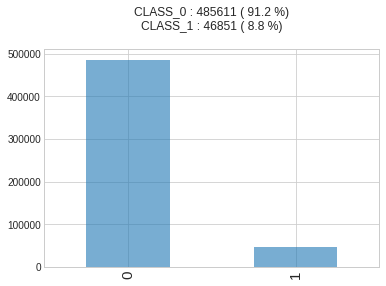

In [ ]:
y_tr = df_tr.iloc[:,-1].values

ml.fn_distr_labels_clf(y_tr)

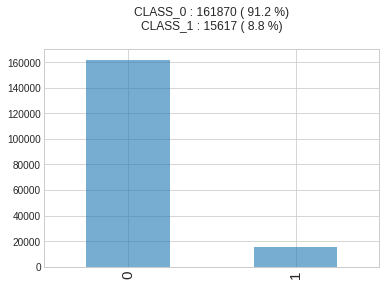

In [ ]:
y_eval = df_eval.iloc[:, -1].values

ml.fn_distr_labels_clf(y_eval)

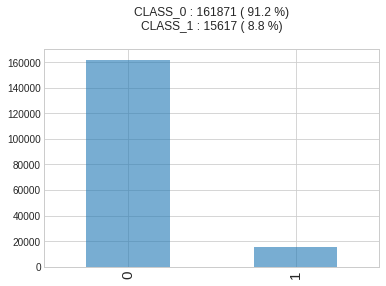

In [ ]:
y_ts = df_ts.iloc[:, -1].values

ml.fn_distr_labels_clf(y_ts)

**Feature Selection**

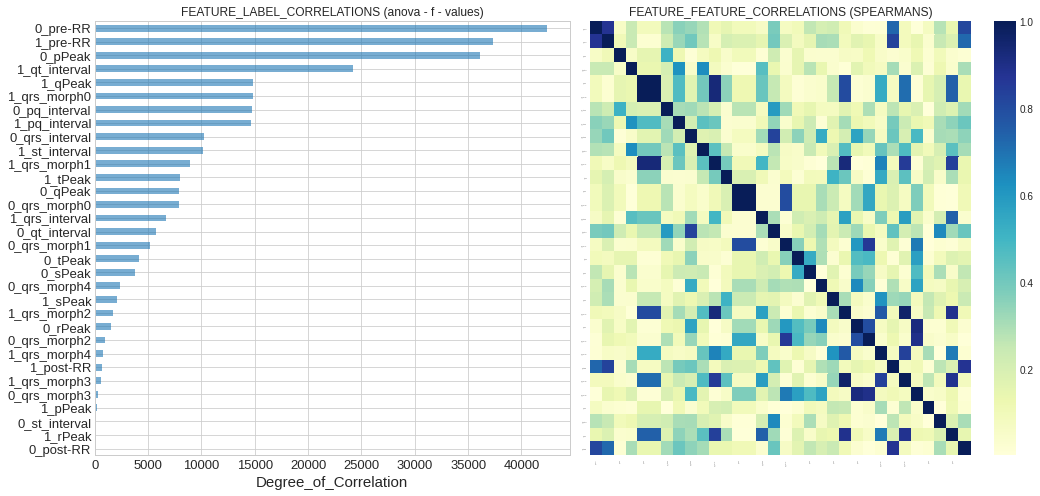

In [ ]:
f_ratios,df_corr,best_feats = ml.fn_feat_select_clfn(df_tr,
                                                                    thresh_feat_label = None,
                                                                    thresh_feat_feat = None,
                                                                    figsize = (15,7))

- This plot on the above shows Feature Label Correlation i.e., how well that feature is correlated with class label and feature feature correlation matrix.

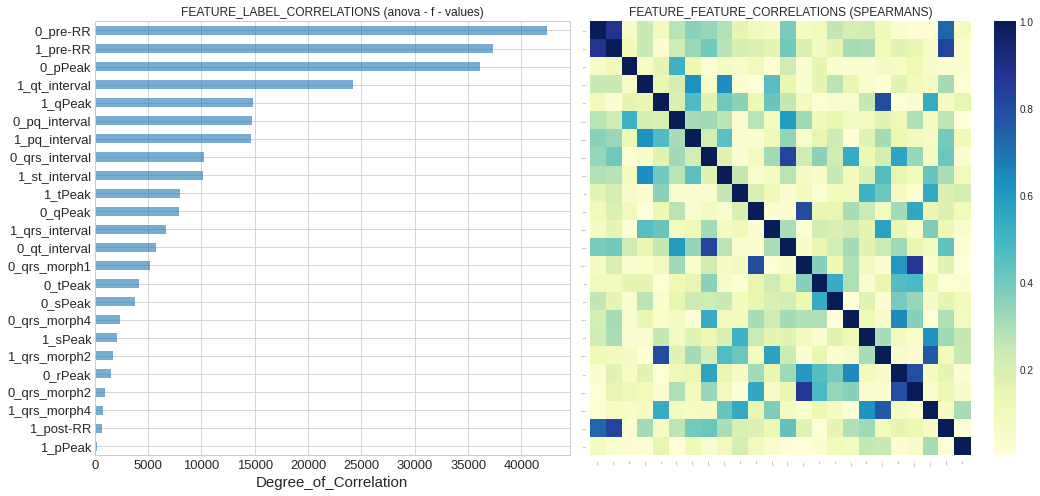

In [ ]:
f_ratios_2,df_corr_2,best_feats_2 = ml.fn_feat_select_clfn(df_tr,
                                                          thresh_feat_label = 50,
                                                          thresh_feat_feat = 0.9,
                                                          figsize = (15,7))

- From this plot, We are selecting Best features and form an other dataset with selected feautres having threshold feature label value is 50 and threshold feature feature value is 0.9.

In [ ]:
df_tr = df_tr.loc[:, best_feats].assign(labels = y_tr)
df_eval = df_eval.loc[:, best_feats].assign(labels = y_eval)
df_ts = df_ts.loc[:, best_feats].assign(labels = y_ts)

In [ ]:
df_tr.shape

(532462, 33)

In [ ]:
df_tr_small = df_tr.loc[:, best_feats_2].assign(labels = y_tr)
df_eval_small = df_eval.loc[:, best_feats_2].assign(labels = y_eval)
df_ts_small = df_ts.loc[:, best_feats_2].assign(labels = y_ts)

In [ ]:
df_tr_small.shape

(532462, 25)

**Distribution of Top 4 feature that highly correlated with Labels**

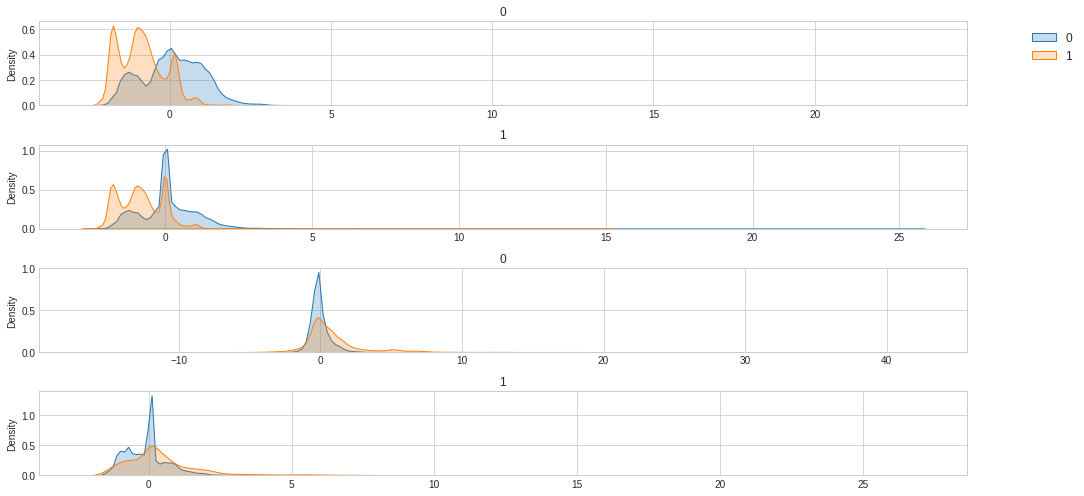

In [ ]:
df_feat_stats = ml.fn_distr_feats_labels(df_tr,n_top_feats = 4,figsize = (15,7))

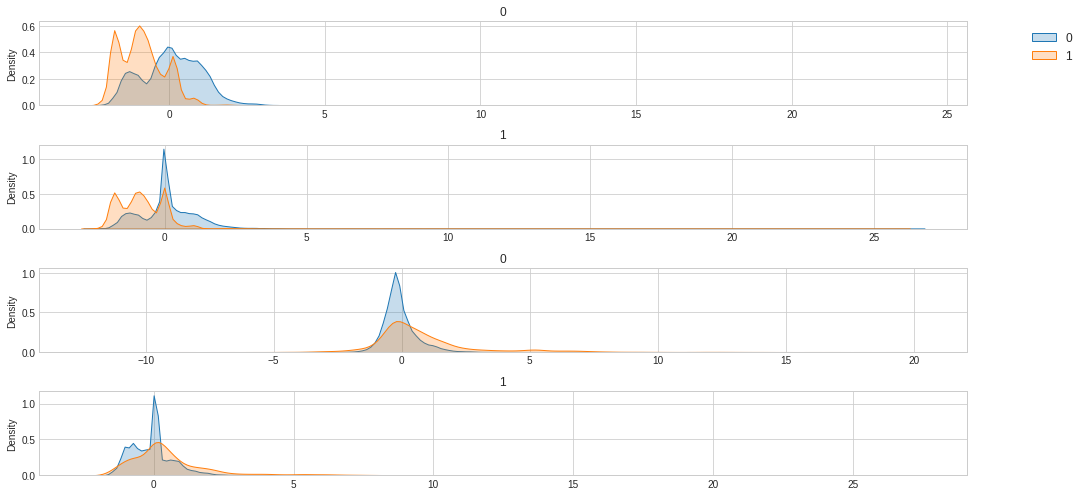

In [ ]:
df_feat_stats = ml.fn_distr_feats_labels(df_eval,n_top_feats = 4,figsize = (15,7))

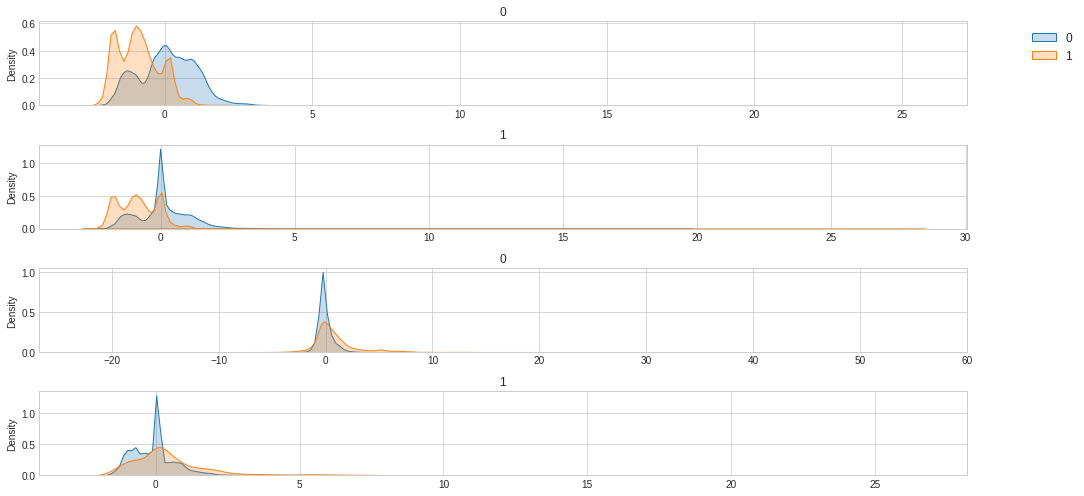

In [ ]:
df_feat_stats = ml.fn_distr_feats_labels(df_ts,n_top_feats = 4,figsize = (15,7))

- It is observed that majority is overlapped.
- But from the plot, we can gain the informations like
- If 0_pre-RR is greater than 0, then most of the persons with no Arrythmia. Otherwise, most of the persons with Arrythmia.
- If 1_pre-RR is greater or equal to 0, then most of the persons with no Arrythmia. Otherwise, most of the persons with Arrythmia.

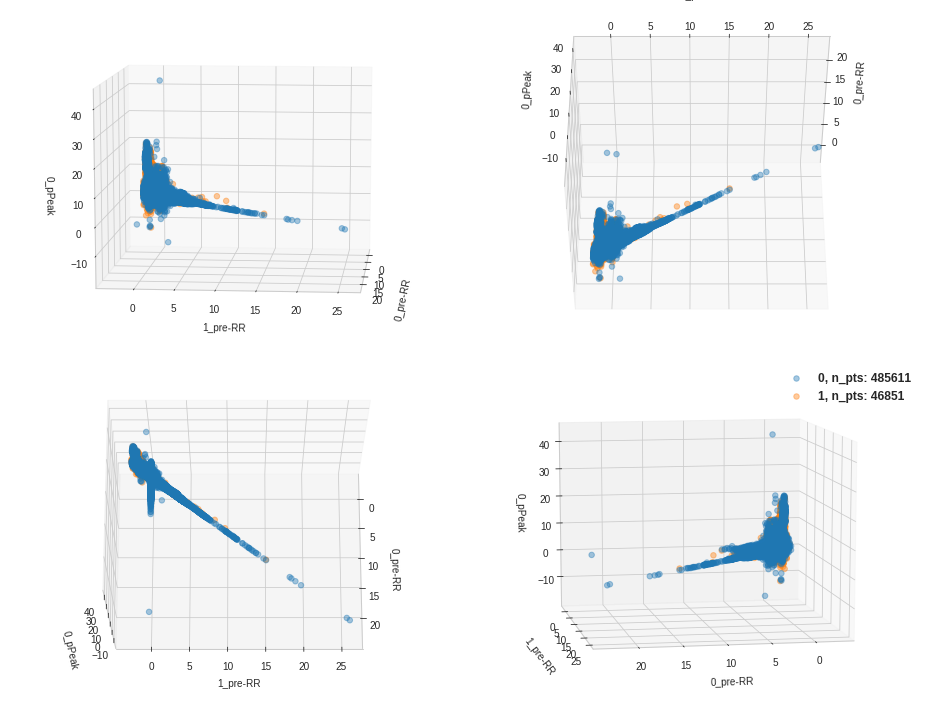

In [ ]:
ml.fn_plot_3d_clf(df_tr)

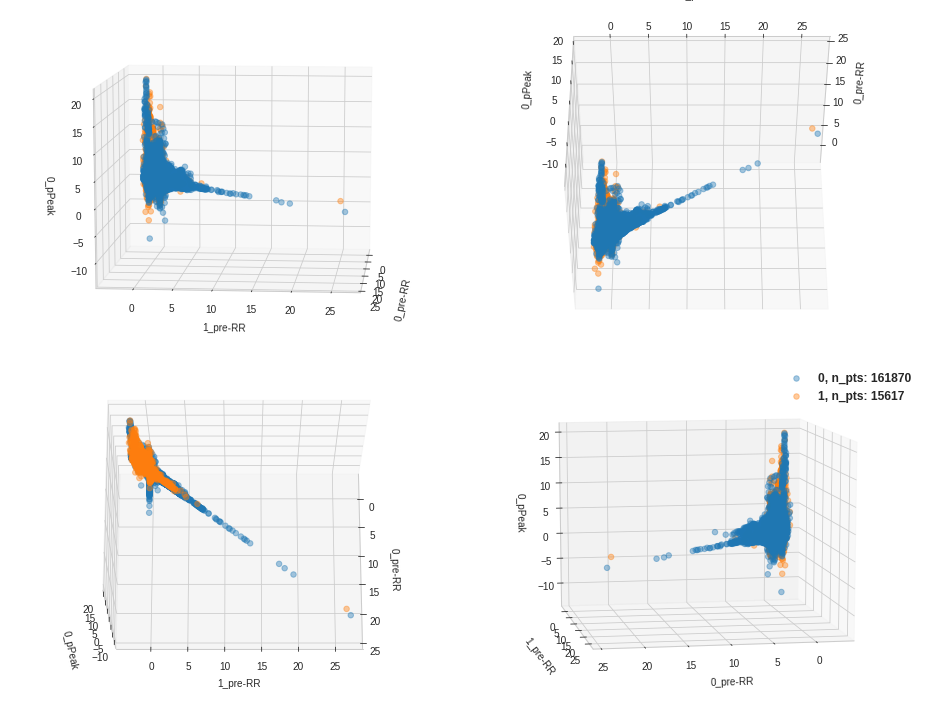

In [ ]:
ml.fn_plot_3d_clf(df_eval)

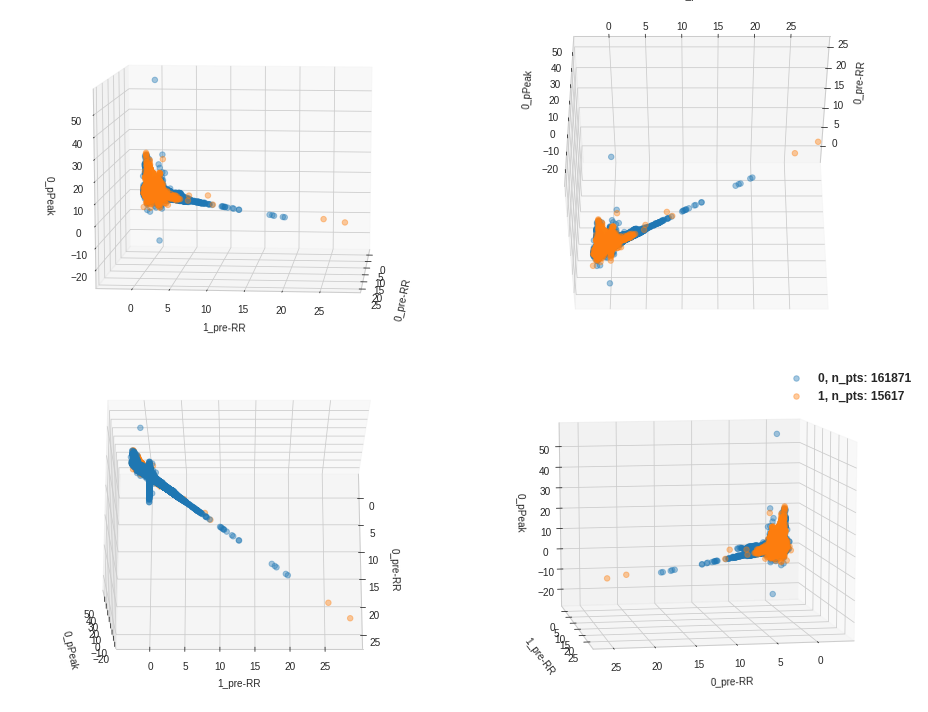

In [ ]:
ml.fn_plot_3d_clf(df_ts)

In [ ]:
param_grid_ = dict(penalty = ['l2', 'l1'], 
                   class_weight = ["balanced"],
                            C = [1e-7,1e0,10000000000],
                       solver = ['saga'],
                     max_iter = [30_000],
                 random_state = [0])
param_grid = ml.fn_param_grid(param_grid_)

In [ ]:
for i in param_grid:
    print(i)
    print()

{'C': 1e-07, 'class_weight': 'balanced', 'max_iter': 30000, 'penalty': 'l2', 'random_state': 0, 'solver': 'saga'}

{'C': 1e-07, 'class_weight': 'balanced', 'max_iter': 30000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}

{'C': 1.0, 'class_weight': 'balanced', 'max_iter': 30000, 'penalty': 'l2', 'random_state': 0, 'solver': 'saga'}

{'C': 1.0, 'class_weight': 'balanced', 'max_iter': 30000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}

{'C': 10000000000, 'class_weight': 'balanced', 'max_iter': 30000, 'penalty': 'l2', 'random_state': 0, 'solver': 'saga'}

{'C': 10000000000, 'class_weight': 'balanced', 'max_iter': 30000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}



In [ ]:
from sklearn.linear_model import LogisticRegression

X_tr, y_tr = df_tr.iloc[:, :-1].values, df_tr.iloc[:, -1].values

model_class = LogisticRegression
trained_models = ml.fn_train_models(X_tr, y_tr, model_class, param_grid)

100% (6 of 6) |##########################| Elapsed Time: 0:03:54 Time:  0:03:54


**Original Dataset**

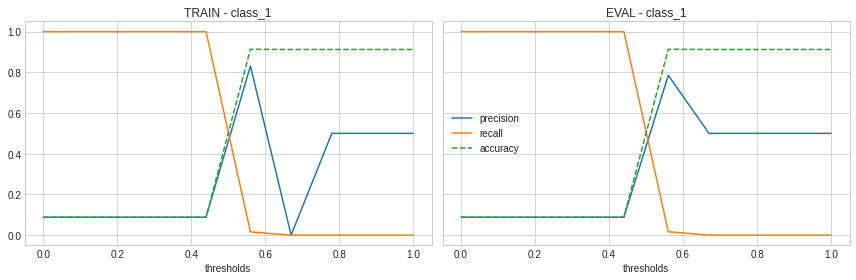

In [ ]:
model_n = 0

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

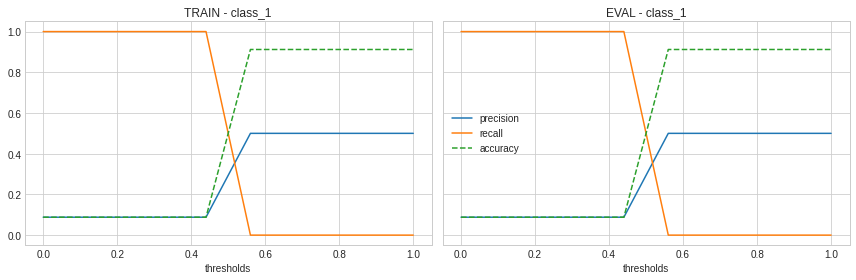

In [ ]:
model_n = 1

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

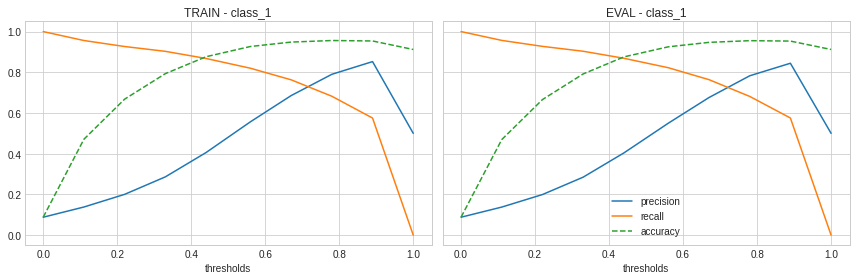

In [ ]:
model_n = 2
X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

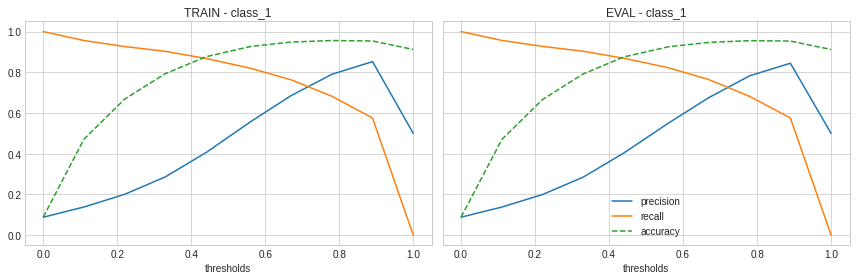

In [ ]:
model_n = 3

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

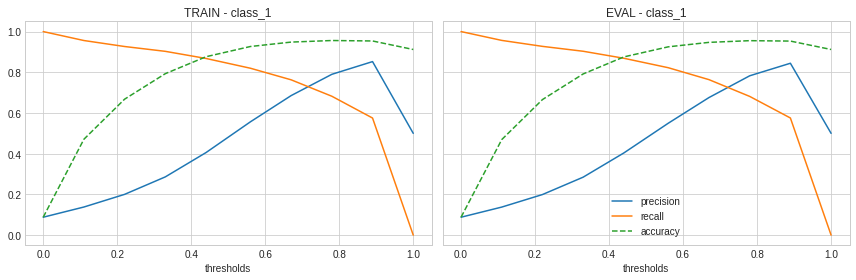

In [ ]:
model_n = 4

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

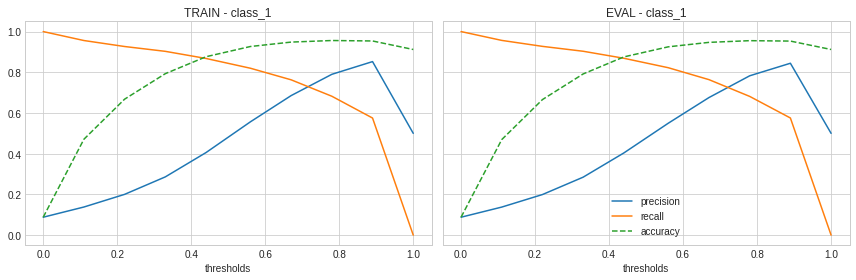

In [ ]:
model_n = 5

X_eval, y_eval = df_eval.iloc[:, :-1].values, df_eval.iloc[:, -1].values
y_tr_proba = trained_models[model_n].predict_proba(X_tr)[:, 1]
y_eval_proba = trained_models[model_n].predict_proba(X_eval)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba, y_eval, y_eval_proba, class_ = 1)

In [ ]:
ml.fn_test_model_binary_clf(df_ts, model_class, threshold_class_1 = 0.72)

--------------------
LOGLOSS : 0.2982
ACCURACY: 0.953
--------------------



,prec,rec
class_0,0.974,0.975
class_1,0.735,0.727


**Best Feature Dataset**

In [ ]:
from sklearn.linear_model import LogisticRegression

X_tr_small, y_tr_small = df_tr_small.iloc[:, :-1].values, df_tr_small.iloc[:, -1].values

model_class = LogisticRegression
trained_models_small = ml.fn_train_models(X_tr_small, y_tr_small, model_class, param_grid)

100% (6 of 6) |##########################| Elapsed Time: 0:00:19 Time:  0:00:19


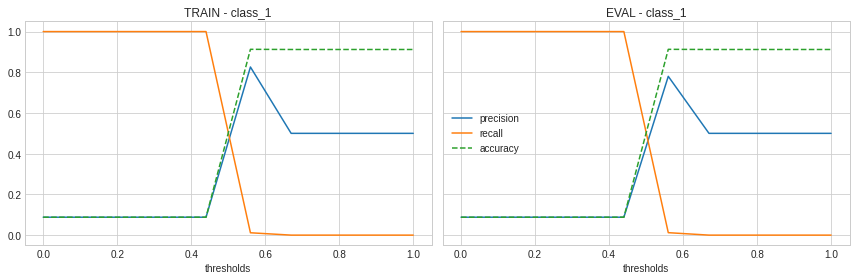

In [ ]:
model_n = 0

X_eval_small, y_eval_small = df_eval_small.iloc[:, :-1].values, df_eval_small.iloc[:, -1].values
y_tr_proba_small = trained_models_small[model_n].predict_proba(X_tr_small)[:, 1]
y_eval_proba_small = trained_models_small[model_n].predict_proba(X_eval_small)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba_small, y_eval, y_eval_proba_small, class_ = 1)

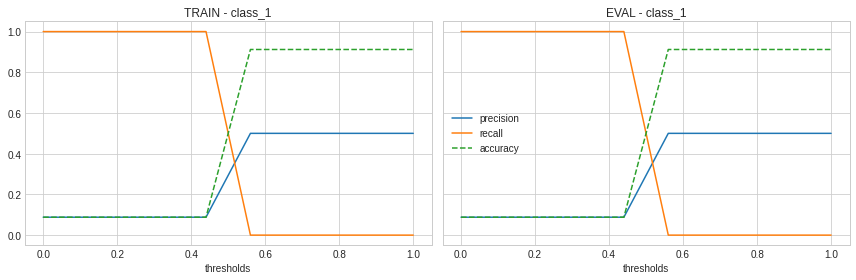

In [ ]:
model_n = 1

X_eval_small, y_eval_small = df_eval_small.iloc[:, :-1].values, df_eval_small.iloc[:, -1].values
y_tr_proba_small = trained_models_small[model_n].predict_proba(X_tr_small)[:, 1]
y_eval_proba_small = trained_models_small[model_n].predict_proba(X_eval_small)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba_small, y_eval, y_eval_proba_small, class_ = 1)

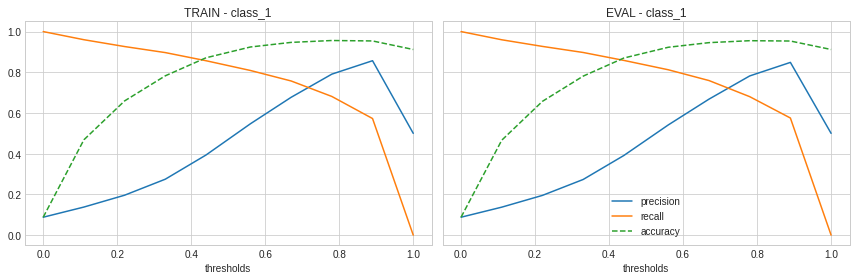

In [ ]:
model_n = 2

X_eval_small, y_eval_small = df_eval_small.iloc[:, :-1].values, df_eval_small.iloc[:, -1].values
y_tr_proba_small = trained_models_small[model_n].predict_proba(X_tr_small)[:, 1]
y_eval_proba_small = trained_models_small[model_n].predict_proba(X_eval_small)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba_small, y_eval, y_eval_proba_small, class_ = 1)

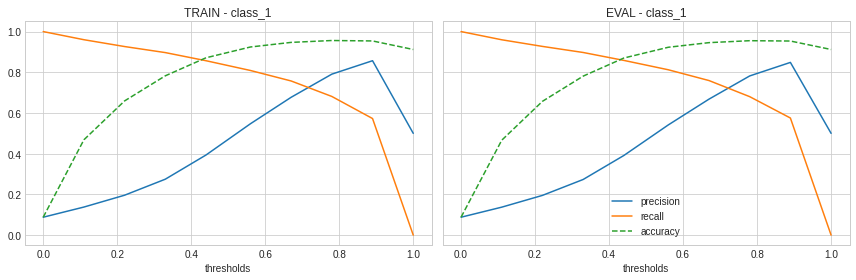

In [ ]:
model_n = 3

X_eval_small, y_eval_small = df_eval_small.iloc[:, :-1].values, df_eval_small.iloc[:, -1].values
y_tr_proba_small = trained_models_small[model_n].predict_proba(X_tr_small)[:, 1]
y_eval_proba_small = trained_models_small[model_n].predict_proba(X_eval_small)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba_small, y_eval, y_eval_proba_small, class_ = 1)

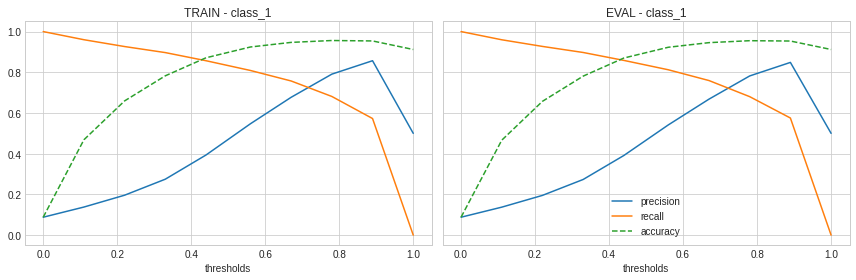

In [ ]:
model_n = 4

X_eval_small, y_eval_small = df_eval_small.iloc[:, :-1].values, df_eval_small.iloc[:, -1].values
y_tr_proba_small = trained_models_small[model_n].predict_proba(X_tr_small)[:, 1]
y_eval_proba_small = trained_models_small[model_n].predict_proba(X_eval_small)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba_small, y_eval, y_eval_proba_small, class_ = 1)

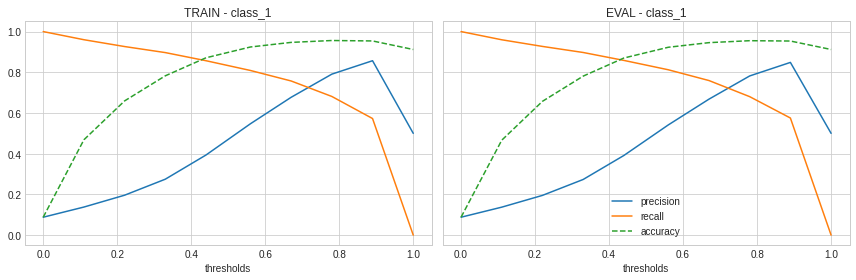

In [ ]:
model_n = 5

X_eval_small, y_eval_small = df_eval_small.iloc[:, :-1].values, df_eval_small.iloc[:, -1].values
y_tr_proba_small = trained_models_small[model_n].predict_proba(X_tr_small)[:, 1]
y_eval_proba_small = trained_models_small[model_n].predict_proba(X_eval_small)[:, 1]

ml.fn_pr_rec_tr_eval(y_tr, y_tr_proba_small, y_eval, y_eval_proba_small, class_ = 1)

In [ ]:
ml.fn_test_model_binary_clf(df_ts_small, model_class_small, threshold_class_1 = 0.60)

--------------------
LOGLOSS : 0.3024
ACCURACY: 0.934
--------------------



,prec,rec
class_0,0.979,0.948
class_1,0.593,0.792
